In [11]:
!python --version
import tensorflow as tf
import pandas as pd
print(tf.__version__)
import keras
from sklearn.model_selection import train_test_split
from keras import *
from keras.src.layers import Dense,LeakyReLU, Dropout
import matplotlib.pyplot as plt
import numpy as np

Python 3.10.11
2.15.0


In [4]:
import numpy as np
import os

os.environ["KERAS_BACKEND"] = "tensorflow"

# Note that Keras should only be imported after the backend
# has been configured. The backend cannot be changed once the
# package is imported.
import keras

In [12]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

11490434/11490434 [==============================] - 1s 0us/step
x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


In [13]:
# Model parameters
num_classes = 10
input_shape = (28, 28, 1)

model = keras.Sequential(
    [
        keras.layers.Input(shape=input_shape),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.Conv2D(128, kernel_size=(3, 3), activation="relu"),
        keras.layers.GlobalAveragePooling2D(),
        keras.layers.Dropout(0.5),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 10, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 global_average_pooling2d (  (None, 128)               0         
 GlobalAveragePooling2D)                                

In [15]:
model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(),
    optimizer=keras.optimizers.Adam(learning_rate=1e-3),
    metrics=[
        keras.metrics.SparseCategoricalAccuracy(name="acc"),
    ],
)


In [ ]:
batch_size = 128
epochs = 20

callbacks = [
    keras.callbacks.ModelCheckpoint(filepath="model_at_epoch_{epoch}.keras"),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=2),
]

model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.15,
    callbacks=callbacks,
)
score = model.evaluate(x_test, y_test, verbose=0)

Epoch 1/20
399/399 [==============================] - 123s 304ms/step - loss: 0.8236 - acc: 0.7186 - val_loss: 0.1641 - val_acc: 0.9547
Epoch 2/20
399/399 [==============================] - 146s 366ms/step - loss: 0.2364 - acc: 0.9290 - val_loss: 0.0829 - val_acc: 0.9773
Epoch 3/20
399/399 [==============================] - 197s 494ms/step - loss: 0.1637 - acc: 0.9512 - val_loss: 0.0657 - val_acc: 0.9832
Epoch 4/20
399/399 [==============================] - 196s 489ms/step - loss: 0.1276 - acc: 0.9626 - val_loss: 0.0552 - val_acc: 0.9847
Epoch 5/20
399/399 [==============================] - 155s 388ms/step - loss: 0.1084 - acc: 0.9684 - val_loss: 0.0441 - val_acc: 0.9889
Epoch 6/20
 17/399 [>.............................] - ETA: 2:13 - loss: 0.1049 - acc: 0.9651

## OUR ANN!

In [2]:
# Read DATA
data = pd.read_csv("training_data/test-training-data2.csv")

Y = data['Y']
X = data.drop(['Y'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.16, random_state=10)

In [17]:
# Model
num_classes = 1

model = Sequential([
    Dense(units=250, input_shape= (294,), activation = 'sigmoid'),
    Dropout(0.2),
    Dense(units=100, activation = 'sigmoid'),
    Dense(units=50, activation = LeakyReLU(0.1)),
    Dropout(0.2),
    Dense(units=num_classes, activation='relu'),
])


model.summary()

model.compile(
    loss=keras.losses.MeanAbsoluteError(),
    optimizer=keras.optimizers.Adam(),
    metrics=["mae"],
)

history = model.fit(X_train, Y_train, epochs=40, validation_split=0.15)

test_scores = model.evaluate(X_test, Y_test, verbose=2)


print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 250)               73750     
                                                                 
 dropout_4 (Dropout)         (None, 250)               0         
                                                                 
 dense_21 (Dense)            (None, 100)               25100     
                                                                 
 dense_22 (Dense)            (None, 50)                5050      
                                                                 
 dropout_5 (Dropout)         (None, 50)                0         
                                                                 
 dense_23 (Dense)            (None, 1)                 51        
                                                                 
Total params: 103951 (406.06 KB)
Trainable params: 103

In [5]:
index = 30

A = X_test.iloc[index].to_numpy()
A = A.reshape(1,294)

B = Y_test.iloc[index]
print("X: ", A)
print("Y: ", B)


X:  [[-1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
   1 -1 -1  1 -1  1 -1  1 -1 -1  1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1
  -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1  1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  0  0  0  1  0  0  0  1  0  1  0 -1 -1
   1 -1 -1  1 -1 -1]]
Y:  0


In [19]:
model.evaluate(X_test, Y_test, verbose=2)

model.save("ANN-3Layers-Sigmoid-Leaky-2Dropout-40.keras")

2600/2600 - 2s - loss: 3.7729 - mae: 3.7729 - 2s/epoch - 908us/step


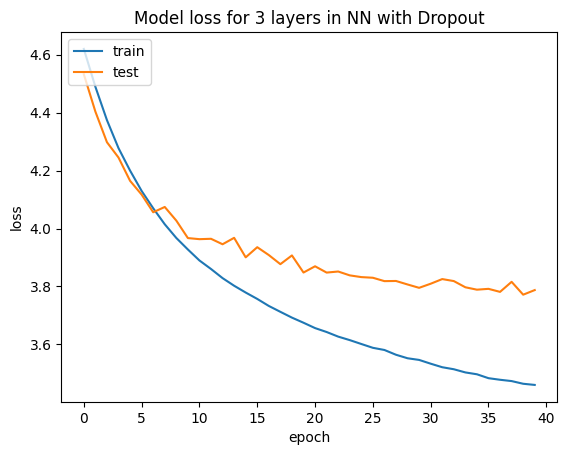

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss for 3 layers in NN with Dropout')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## LOADING EXISTING NETWORK

In [42]:
def create_model():
    model = Sequential([
        Dense(units=250, input_shape= (294,), activation = 'relu'),
        Dense(units=100, activation = 'relu'),
        Dense(units=50, activation = 'relu'),
        Dense(units=num_classes, activation='relu'),
    ])

    model.summary()
    
    model.compile(
        loss=keras.losses.MeanAbsoluteError(),
        optimizer=keras.optimizers.Adam(),
        metrics=["mae"],
    )
    return model

In [0]:
# Create new model and load in weights
model = create_model()
model.load_weights('ANN-3Layers.keras')

In [16]:
# Testing loaded model
index = 35
A = X_test.iloc[index].to_numpy()
A = A.reshape(1,294)

B = Y_test.iloc[index]
print("X: ", A)
print("Y: ", B)
print(model.predict(A))


Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 250)               73750     
                                                                 
 dense_33 (Dense)            (None, 100)               25100     
                                                                 
 dense_34 (Dense)            (None, 50)                5050      
                                                                 
 dense_35 (Dense)            (None, 1)                 51        
                                                                 
Total params: 103951 (406.06 KB)
Trainable params: 103951 (406.06 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


X:  [[ 1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
  -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
   1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1
  -1  1 -1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1
   1  1 -1 -1 -1  1 -1 -1 -1  1  1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
   1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1 -1  1
  -1 -1 -1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1 -1  1  1 -1 -1 -1  1
   1  1 -1 -1 -1  1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1 -1 -1  1
  -1  1 -1 -1  1 -1 -1  1 -1 -1 -1 -1  1 -1  1  1  1  1 -1  1 -1  1  1 -1
  -1 -1 -1 -1  1 -1]]
Y:  2
1/1 [==============================] - 0s 57ms/step
[[1.9475459]]


2600/2600 - 4s - loss: 4.0425 - mae: 4.0425 - 4s/epoch - 1ms/step


[4.042544364929199, 4.042544364929199]

In [20]:
# Plotting the errors per round
errors = []
for i in range(1000):
    input = X_test.iloc[i].to_numpy()
    input = input.reshape(1,294)
    
    actual_points = Y_test.iloc[i]
    pred_points = model.predict(input)
    
    errors.append(actual_points - pred_points)


1/1 [==============================] - 0s 55ms/step


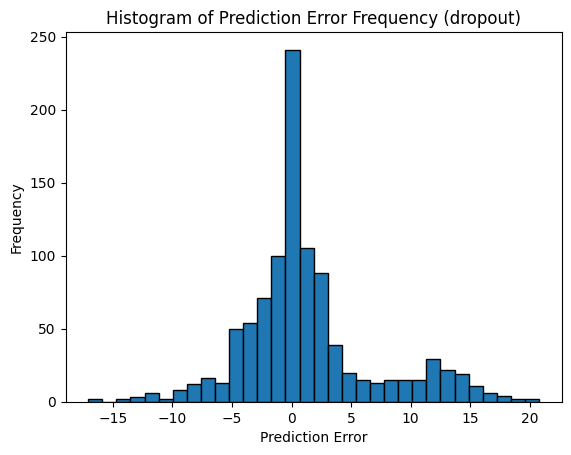

Mean of errors: 1.2808071374893188
Standard Deviation of errors: 5.617477893829346


In [33]:
error_values = np.array(errors)
error_values = error_values.reshape((1000,1))

mean_error = np.mean(error_values)
std_dev_error = np.std(error_values)

plt.hist(error_values, bins=32, edgecolor='black')

# Adding labels and title
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Error Frequency (dropout)')

# Display the plot
plt.show()

print(f"Mean of errors: {mean_error}")
print(f"Standard Deviation of errors: {std_dev_error}")

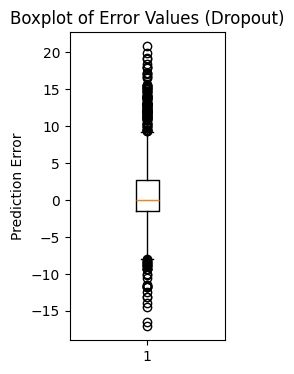

In [32]:
# Create a boxplot
plt.figure(figsize=(2, 4))
plt.boxplot(error_values)

# Adding labels and title
plt.xlabel('')
plt.ylabel('Prediction Error')
plt.title('Boxplot of Error Values (Dropout)')

# Display the plot
plt.show()